In [0]:
# {0: 'Camera',
#  1: 'Selection',
#  2: 'Ability',
#  3: 'Right Click',
#  4: 'SetControlGroup',
#  5: 'GetControlGroup',
#  6: 'AddToControlGroup',
#  7: 'ControlGroup'}

In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star')

In [0]:
import pandas as pd
rightc = pd.read_feather('data/rightclick.feather')

In [161]:
print(rightc.shape)
rightc

(11565877, 10)


,game_id,winner,time,player,species,event,event_contents,loc_x,loc_y,loc_z
0,0.0,1.0,0.00,0.0,0.0,3.0,"Location: (136.3759765625, 41.11962890625, 49016)",136.375977,41.119629,49016.0
1,0.0,1.0,0.00,0.0,0.0,3.0,"Location: (136.033935546875, 41.735107421875, ...",136.033936,41.735107,49104.0
2,0.0,1.0,0.02,0.0,0.0,3.0,"Location: (32.222900390625, 153.720703125, 49120)",32.222900,153.720703,49120.0
3,0.0,1.0,0.02,0.0,0.0,3.0,"Location: (29.195068359375, 143.441650390625, ...",29.195068,143.441650,49120.0
4,0.0,1.0,0.14,0.0,0.0,3.0,"Location: (29.195068359375, 129.53466796875, 4...",29.195068,129.534668,45828.0
...,...,...,...,...,...,...,...,...,...,...
11565872,38871.0,0.0,7.40,0.0,2.0,3.0,Target: DestructibleSignsFunny [004C0001]; Loc...,168.500000,24.500000,49088.0
11565873,38871.0,0.0,7.41,0.0,2.0,3.0,Target: DestructibleSignsFunny [004C0001]; Loc...,168.500000,24.500000,49088.0
11565874,38871.0,0.0,7.41,0.0,2.0,3.0,Target: DestructibleSignsFunny [004C0001]; Loc...,168.500000,24.500000,49088.0
11565875,38871.0,0.0,7.41,0.0,2.0,3.0,"Location: (136.720458984375, 69.50830078125, 4...",136.720459,69.508301,40907.0


In [0]:
for i in rightc.event_contents[:100]:
    print(i)

Location: (136.3759765625, 41.11962890625, 49016)
Location: (136.033935546875, 41.735107421875, 49104)
Location: (32.222900390625, 153.720703125, 49120)
Location: (29.195068359375, 143.441650390625, 49120)
Location: (29.195068359375, 129.53466796875, 45828)
Location: (26.167236328125, 116.232421875, 40928)
Location: (23.744873046875, 113.813720703125, 40977)
Target: None [00100001]; Location: (150.0, 22.5, 49120)
Target: Refinery [03800001]; Location: (27.5, 154.5, 49120)
Location: (57.0517578125, 137.395263671875, 32736)
Target: None [01200001]; Location: (140.0, 47.0, 40928)
Location: (145.162109375, 50.71923828125, 40935)
Target: None [01000001]; Location: (154.0, 55.5, 40928)
Location: (31.16015625, 131.819091796875, 49139)
Location: (25.115478515625, 140.2294921875, 49127)
Target: None [00A80001]; Location: (18.0, 147.5, 49120)
Location: (137.45947265625, 36.150146484375, 49127)
Target: None [00A80001]; Location: (18.0, 147.5, 49120)
Location: (42.3046875, 148.72900390625, 49127)


# location만 가져오기


In [0]:
# import re
# pat = re.compile('Location+\S\s\S[0-9.,\s]+\S')
# location= rightc.event_contents.apply(lambda x: pat.search(x).group())

In [0]:
# pat2 = re.compile('[^0-9,.]')
# location = location.apply(lambda x: pat2.sub('',x).split(','))

In [0]:
# len(loc_x),len(loc_y),len(loc_z)

(11565877, 11565877, 11565877)

## 적군 starting point 인근 아군 right click

In [162]:
# 스타팅 포인트 데이터 불러오기
starting = pd.read_csv('data/starting.csv')
print(starting.shape)

(38872, 8)


In [0]:

p0_rc = rightc[rightc.player==0]
p1_rc = rightc[rightc.player==1]

In [0]:
p0_starting= pd.merge(p0_rc,starting,on='game_id',how='left')
p1_starting = pd.merge(p1_rc,starting,on='game_id',how = 'left')

In [165]:
p0_starting.shape,p1_starting.shape

((5789678, 17), (5776199, 17))

In [166]:
p1_starting.head()

,game_id,winner,time,player,species,event,event_contents,loc_x,loc_y,loc_z,Unnamed: 0,P0_x,P0_y,P1_x,P1_y,P0_starting,P1_starting
0,0.0,1.0,0.14,1.0,0.0,3.0,"Target: Refinery [03800001]; Location: (27.5, ...",27.500000,154.500000,49120.0,0,145.25,21.507812,22.75,147.007812,8,13
1,0.0,1.0,0.15,1.0,0.0,3.0,"Location: (31.16015625, 131.819091796875, 49139)",31.160156,131.819092,49139.0,0,145.25,21.507812,22.75,147.007812,8,13
2,0.0,1.0,0.16,1.0,0.0,3.0,"Location: (25.115478515625, 140.2294921875, 49...",25.115479,140.229492,49127.0,0,145.25,21.507812,22.75,147.007812,8,13
3,0.0,1.0,0.16,1.0,0.0,3.0,"Target: None [00A80001]; Location: (18.0, 147....",18.000000,147.500000,49120.0,0,145.25,21.507812,22.75,147.007812,8,13
4,0.0,1.0,0.20,1.0,0.0,3.0,"Target: None [00A80001]; Location: (18.0, 147....",18.000000,147.500000,49120.0,0,145.25,21.507812,22.75,147.007812,8,13


In [0]:
# 적군 스타팅 포인트와 아군 right click간의 거리 구하기
import numpy as np
a= np.sqrt((p0_starting.loc_x-p0_starting.P1_x)**2 + (p0_starting.loc_y-p0_starting.P1_y)**2)
b= np.sqrt((p1_starting.loc_x-p1_starting.P0_x)**2 + (p1_starting.loc_y-p1_starting.P0_y)**2)

In [0]:
p0_starting['enemy_rc'] = a
p1_starting['enemy_rc'] = b

### 적군 스타팅 포인트와의 거리 40 이하인 데이터만 가져오기

In [0]:
for i in p0_starting.game_id.unique()[:10]:
    globals()['p0_enemy{}'.format(int(i))]= p0_starting[(p0_starting.enemy_rc < 40)&(p0_starting.game_id==i)]


In [0]:
for i in p1_starting.game_id.unique()[:10]:
    globals()['p1_enemy{}'.format(int(i))]= p1_starting[(p1_starting.enemy_rc < 40) &(p1_starting.game_id==i)]


In [0]:
for i in range(10):
    print('game_id {}  '.format(int(i)),'p0_enemy개수:',len(globals()['p0_enemy{}'.format(i)]),'  p1_enemy 개수:',len(globals()['p1_enemy{}'.format(int(i))]), \
          '  winner :',p0_starting.loc[p0_starting.game_id==i,'winner'].unique()[0]
          )

game_id 0   p0_enemy개수: 12   p1_enemy 개수: 0   winner : 1.0
game_id 1   p0_enemy개수: 22   p1_enemy 개수: 26   winner : 1.0
game_id 2   p0_enemy개수: 24   p1_enemy 개수: 33   winner : 0.0
game_id 3   p0_enemy개수: 78   p1_enemy 개수: 42   winner : 0.0
game_id 4   p0_enemy개수: 85   p1_enemy 개수: 10   winner : 0.0
game_id 5   p0_enemy개수: 10   p1_enemy 개수: 9   winner : 0.0
game_id 6   p0_enemy개수: 19   p1_enemy 개수: 42   winner : 1.0
game_id 7   p0_enemy개수: 2   p1_enemy 개수: 133   winner : 0.0
game_id 8   p0_enemy개수: 2   p1_enemy 개수: 9   winner : 1.0
game_id 9   p0_enemy개수: 5   p1_enemy 개수: 10   winner : 1.0


### starting point, right click 시각화

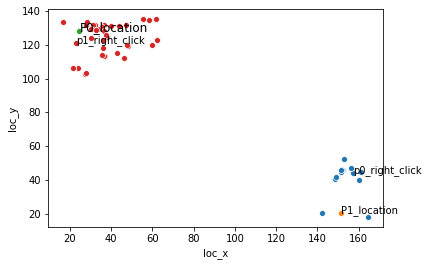

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)


sns.scatterplot(data= p0_enemy, x=p0_enemy.loc_x,y= p0_enemy.loc_y)
plt.text(x=p0_enemy.loc_x[:1],y=p0_enemy.loc_y[:1],s= 'p0_right_click')

sns.scatterplot(data= p0_enemy, x=p0_enemy.P1_x,y= p0_enemy.P1_y)
plt.text(x=p0_enemy.P1_x[:1],y=p0_enemy.P1_y[:1],s= 'P1_location')

sns.scatterplot(data= p0_enemy, x=p0_enemy.P0_x,y= p0_enemy.P0_y)
plt.text(x=p0_enemy.P0_x[:1],y=p0_enemy.P0_y[:1],s= 'P0_location',fontsize=12)

sns.scatterplot(data= p1_enemy, x=p1_enemy.loc_x,y= p1_enemy.loc_y)
plt.text(x=p1_enemy.loc_x[:1],y=p1_enemy.loc_y[:1],s= 'p1_right_click')

plt.show()

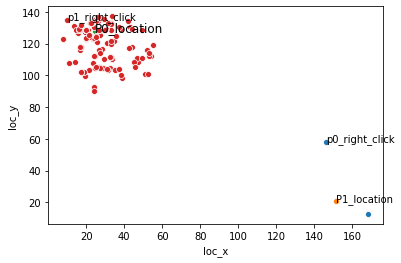

In [0]:

sns.scatterplot(data= p0_enemy7, x=p0_enemy7.loc_x,y= p0_enemy7.loc_y)
plt.text(x=p0_enemy7.loc_x[:1],y=p0_enemy7.loc_y[:1],s= 'p0_right_click')

sns.scatterplot(data= p0_enemy7, x=p0_enemy7.P1_x,y= p0_enemy7.P1_y)
plt.text(x=p0_enemy7.P1_x[:1],y=p0_enemy7.P1_y[:1],s= 'P1_location')

sns.scatterplot(data= p0_enemy7, x=p0_enemy7.P0_x,y= p0_enemy7.P0_y)
plt.text(x=p0_enemy7.P0_x[:1],y=p0_enemy7.P0_y[:1],s= 'P0_location',fontsize=12)

sns.scatterplot(data= p1_enemy7, x=p1_enemy7.loc_x,y= p1_enemy7.loc_y)
plt.text(x=p1_enemy7.loc_x[:1],y=p1_enemy7.loc_y[:1],s= 'p1_right_click')

plt.show()

- p1이 p0 스타팅포인트 인근에 많은 right click을 했지만 p0가 이김
- 적군 인근 right click 개수가 승패에 영향이 있는지 확인해볼 필요가 
있어보인다.


In [0]:
# for i in p0_starting.game_id.unique()[:10]:
#     p0_starting[(p0_starting.game_id==i)&(p0_starting.enemy_rc<40)]
a= p0_starting.loc[p0_starting.enemy_rc<40,'game_id'].value_counts()

In [0]:
a=p1_starting.loc[p1_starting.enemy_rc<40,'game_id'].value_counts()

In [0]:
p1_count = pd.DataFrame(a.keys(),columns=['game_id'])
p1_count.index = p1_count.game_id
p1_count.drop('game_id',axis=1,inplace=True)
p1_count['p1_count'] = a.values

In [0]:
p0_count = pd.DataFrame(a.keys(),columns=['game_id'])
p0_count.index = p0_count.game_id
p0_count.drop('game_id',axis=1,inplace=True)
p0_count['p0_count'] = a.values

In [0]:
df_enemyrc = pd.DataFrame(starting.game_id.unique(),columns=['game_id'])
df_enemyrc.index= df_enemyrc.game_id
df_enemyrc.drop('game_id',axis=1,inplace=True)

In [0]:
df_enemyrc= pd.merge(df_enemyrc,p0_count,on='game_id',how='left')

In [0]:
df_enemyrc = pd.merge(df_enemyrc,p1_count,on='game_id',how='left')

In [0]:
df_enemyrc

,p0_count,p1_count
game_id,,
0.0,12.0,NaN
1.0,22.0,26.0
2.0,24.0,33.0
3.0,78.0,42.0
4.0,85.0,10.0
...,...,...
38867.0,56.0,15.0
38868.0,111.0,7.0
38869.0,49.0,34.0


In [0]:
x_train = pd.read_csv('data/xy_train.csv')

In [0]:
print(x_train.shape)
x_train.head()

(38872, 37)


,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,player0_starting,player1_starting,map,P0_enemy_rc,P1_enemy_rc
0,0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45,2,1,0.0,12.0,NaN
1,1,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177,4,15,2.0,22.0,26.0
2,2,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86,14,10,6.0,24.0,33.0
3,3,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171,8,12,5.0,78.0,42.0
4,4,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64,5,9,3.0,85.0,10.0


In [0]:
x_train.P0_enemy_rc = x_train.P0_enemy_rc.fillna(0)
x_train.P1_enemy_rc = x_train.P1_enemy_rc.fillna(0)

In [0]:
x_train[x_train.P1_enemy_rc.isnull()]

,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,player0_starting,player1_starting,map,P0_enemy_rc,P1_enemy_rc


In [0]:
x_train['delta_enemy_rc'] = x_train.P0_enemy_rc -x_train.P1_enemy_rc
x_train['delta_wm'] = x_train.p0_wm- x_train.p1_wm

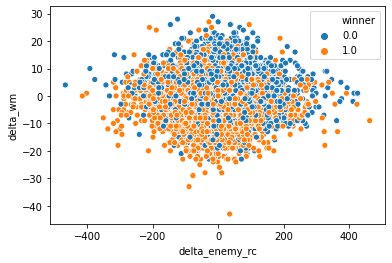

In [0]:
sns.scatterplot(data= x_train, x= 'delta_enemy_rc',y= 'delta_wm',hue= 'winner')

In [0]:
x_train.loc[x_train.delta_enemy_rc>0,'winner'].value_counts()

0.0    10020
1.0     8656
Name: winner, dtype: int64

- 적군기지 right click 개수는 승률에 영향을 미치는 편이다. 

# 자원 데이터

- None값은 자원(미네랄,가스)를 선택한 값

In [0]:
import re

a= rightc.event_contents.str.contains('None')

In [0]:
len(rightc[a]),len(a)

(627809, 11565877)

In [0]:
res = rightc[a]

In [0]:
res.winner.groupby(res.player).value_counts()

player  winner
0.0     0.0       165723
        1.0       151438
1.0     1.0       163083
        0.0       147565
Name: winner, dtype: int64

In [0]:
res

,game_id,winner,time,player,species,event,event_contents
7,0.0,1.0,1,0.0,0.0,3.0,"Target: None [00100001]; Location: (150.0, 22...."
10,0.0,1.0,2,0.0,0.0,3.0,"Target: None [01200001]; Location: (140.0, 47...."
12,0.0,1.0,2,0.0,0.0,3.0,"Target: None [01000001]; Location: (154.0, 55...."
15,0.0,1.0,3,1.0,0.0,3.0,"Target: None [00A80001]; Location: (18.0, 147...."
17,0.0,1.0,3,1.0,0.0,3.0,"Target: None [00A80001]; Location: (18.0, 147...."
...,...,...,...,...,...,...,...
11565482,38871.0,0.0,3,0.0,2.0,3.0,"Target: None [00640001]; Location: (125.0, 20...."
11565521,38871.0,0.0,4,1.0,0.0,3.0,"Target: None [00040001]; Location: (38.0, 129...."
11565633,38871.0,0.0,5,0.0,2.0,3.0,"Target: None [011C0001]; Location: (159.0, 43...."
11565634,38871.0,0.0,5,0.0,2.0,3.0,"Target: None [011C0001]; Location: (159.0, 43...."


## Location 추출

In [0]:
#  .(\d+\.\d+\,\s+\d+.)
pat = re.compile('Location+\S\s\S[0-9.,\s]+\S')
pat.search('Target: Refinery [03980001]; Location: (32.5, 14.5, 49104)')

<_sre.SRE_Match object; span=(29, 58), match='Location: (32.5, 14.5, 49104)'>

In [0]:
pat = re.compile('Location+\S\s\S[0-9.,\s]+\S')
reg_res= res.event_contents.apply(lambda x: pat.search(x).group())

NameError: ignored

In [0]:
reg_res

7           Location: (150.0, 22.5, 49120)
10          Location: (140.0, 47.0, 40928)
12          Location: (154.0, 55.5, 40928)
15          Location: (18.0, 147.5, 49120)
17          Location: (18.0, 147.5, 49120)
                         ...              
11565482    Location: (125.0, 20.5, 40896)
11565521    Location: (38.0, 129.5, 49088)
11565633    Location: (159.0, 43.5, 40896)
11565634    Location: (159.0, 43.5, 40896)
11565822    Location: (159.0, 43.5, 40896)
Name: event_contents, Length: 627809, dtype: object

<!-- ### Location 군집화를 위한 갯수 파악 -->

In [0]:
reg_res.value_counts().head(30)

Location: (18.0, 147.5, 49120)     27074
Location: (29.0, 15.5, 49104)      25419
Location: (150.0, 24.5, 49120)     20212
Location: (144.0, 18.5, 49120)     19365
Location: (24.0, 153.5, 49120)     19139
Location: (150.0, 22.5, 49120)     14734
Location: (151.0, 16.5, 49128)     10484
Location: (162.0, 14.5, 49088)     10382
Location: (26.0, 144.5, 49136)     10356
Location: (18.0, 149.5, 49120)     10318
Location: (126.0, 23.5, 49136)     10303
Location: (154.0, 53.5, 40928)      9980
Location: (23.0, 21.5, 49104)       9979
Location: (38.0, 129.5, 49088)      9839
Location: (149.0, 19.5, 49120)      9100
Location: (25.0, 135.5, 49128)      8637
Location: (147.0, 18.5, 49120)      8410
Location: (19.0, 152.5, 49120)      7936
Location: (155.0, 18.5, 49136)      7429
Location: (150.0, 20.5, 49120)      7340
Location: (157.0, 22.5, 49136)      7291
Location: (25.0, 15.5, 49104)       7271
Location: (151.0, 23.5, 49120)      7234
Location: (145.0, 17.5, 49120)      7079
Location: (156.0

## Location x,y,z 좌표 추출

In [0]:
pat2 = re.compile('[^0-9,.]')
res_loc = reg_res.apply(lambda x : pat2.sub('',x).split(','))

NameError: ignored

In [0]:
res_x = res_loc.str[0].astype(float)
res_y = res_loc.str[1].astype(float)
res_z = res_loc.str[2].astype(float)

In [0]:
len(res_x),len(res_y),len(res_z)

(627809, 627809, 627809)

In [0]:
res['x'] = res_x
res['y'] = res_y
res['z'] = res_z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
res.winner.groupby(res.player).value_counts()

player  winner
0.0     0.0       165723
        1.0       151438
1.0     1.0       163083
        0.0       147565
Name: winner, dtype: int64

In [0]:
res_gamex = res.loc[res.game_id==5,'x']
res_gamey = res.loc[res.game_id==5,'y']
res_gamez = res.loc[res.game_id==5,'z']

In [0]:
res[res.game_id==2]

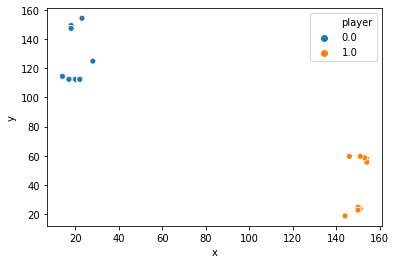

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(res_gamex,res_gamey,hue = res.player)

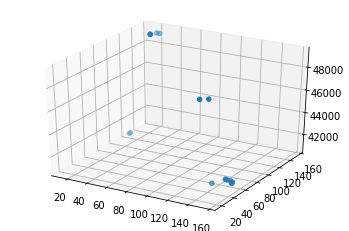

In [0]:

figure = plt.figure()
ax = figure.gca(projection='3d')
ax.scatter(res_gamex,res_gamey,res_gamez)

# 구조물

In [0]:
# DestructibleSignsConstruction

rightc.head()

,game_id,winner,time,player,species,event,event_contents
0,0.0,1.0,0,0.0,0.0,3.0,"Location: (136.3759765625, 41.11962890625, 49016)"
1,0.0,1.0,0,0.0,0.0,3.0,"Location: (136.033935546875, 41.735107421875, ..."
2,0.0,1.0,1,0.0,0.0,3.0,"Location: (32.222900390625, 153.720703125, 49120)"
3,0.0,1.0,1,0.0,0.0,3.0,"Location: (29.195068359375, 143.441650390625, ..."
4,0.0,1.0,1,0.0,0.0,3.0,"Location: (29.195068359375, 129.53466796875, 4..."


In [0]:
cnst=rightc.event_contents.str.contains('DestructibleSignsConstruction')

In [0]:
cnst = rightc[cnst]

In [0]:
cnst

,game_id,winner,time,player,species,event,event_contents
66,1.0,1.0,0,0.0,1.0,3.0,Target: DestructibleSignsConstruction [0008000...
67,1.0,1.0,0,0.0,1.0,3.0,Target: DestructibleSignsConstruction [0000000...
70,1.0,1.0,0,0.0,1.0,3.0,Target: DestructibleSignsConstruction [0000000...
72,1.0,1.0,0,0.0,1.0,3.0,Target: DestructibleSignsConstruction [0000000...
73,1.0,1.0,0,0.0,1.0,3.0,Target: DestructibleSignsConstruction [0000000...
...,...,...,...,...,...,...,...
11565748,38871.0,0.0,7,1.0,0.0,3.0,Target: DestructibleSignsConstruction [0000000...
11565749,38871.0,0.0,7,1.0,0.0,3.0,Target: DestructibleSignsConstruction [0078000...
11565750,38871.0,0.0,7,1.0,0.0,3.0,Target: DestructibleSignsConstruction [0078000...
11565866,38871.0,0.0,8,1.0,0.0,3.0,Target: DestructibleSignsConstruction [0084000...


In [0]:
len(cnst[(cnst.player==0)&(cnst.game_id==0)])

0

In [0]:
p0_con = []
p1_con = []

for i in cnst.game_id.unique():
    p0_dest = len(cnst[(cnst.player==0)&(cnst.game_id==i)])
    p1_dest = len(cnst[(cnst.player==1)&(cnst.game_id==i)])
    p0_con.append(p0_dest)
    p1_con.append(p1_dest)

In [0]:
len(p0_con),len(p1_con)

(33927, 33927)

In [0]:
df = pd.DataFrame()

df['game_id'] = cnst.loc[cnst.game_id.shift(1) != cnst.game_id,'game_id']
df['winner']= cnst.loc[cnst.game_id.shift(1) != cnst.game_id,'winner']
df['player']= cnst.loc[cnst.game_id.shift(1) != cnst.game_id,'player']


In [0]:
df['p0_con'] = p0_con
df['p1_con'] = p1_con
df['delta_con'] = df['p0_con'] -df['p1_con']

In [0]:
df

,game_id,winner,player,p0_con,p1_con,delta_con
66,1.0,1.0,0.0,25,3,22
354,2.0,0.0,1.0,24,33,-9
719,3.0,0.0,1.0,31,76,-45
1262,4.0,0.0,0.0,9,2,7
1964,6.0,1.0,0.0,9,12,-3
...,...,...,...,...,...,...
11564309,38866.0,1.0,1.0,0,9,-9
11564473,38868.0,0.0,1.0,0,6,-6
11564650,38869.0,0.0,0.0,38,6,32
11565080,38870.0,1.0,1.0,8,5,3


In [0]:
df.loc[df.delta_con>0,'winner'].value_counts()

0.0    8715
1.0    7553
Name: winner, dtype: int64

In [0]:
a= cnst.event_contents.apply(lambda x : pat.search(x).group())

In [0]:
a

66          Location: (141.0, 169.5, 49104)
67          Location: (140.0, 168.5, 49104)
70          Location: (140.0, 168.5, 49104)
72          Location: (140.0, 168.5, 49104)
73          Location: (140.0, 168.5, 49104)
                         ...               
11565748     Location: (37.0, 128.5, 49088)
11565749     Location: (71.0, 123.5, 40896)
11565750     Location: (71.0, 123.5, 40896)
11565866     Location: (77.0, 117.5, 40912)
11565867     Location: (77.0, 117.5, 40912)
Name: event_contents, Length: 828419, dtype: object

In [0]:
con_loc= a.apply(lambda x: pat2.sub('',x).split(','))

In [0]:
con_loc

66          [141.0, 169.5, 49104]
67          [140.0, 168.5, 49104]
70          [140.0, 168.5, 49104]
72          [140.0, 168.5, 49104]
73          [140.0, 168.5, 49104]
                    ...          
11565748     [37.0, 128.5, 49088]
11565749     [71.0, 123.5, 40896]
11565750     [71.0, 123.5, 40896]
11565866     [77.0, 117.5, 40912]
11565867     [77.0, 117.5, 40912]
Name: event_contents, Length: 828419, dtype: object

In [0]:
con_loc.str[0].astype(float)

66          141.0
67          140.0
70          140.0
72          140.0
73          140.0
            ...  
11565748     37.0
11565749     71.0
11565750     71.0
11565866     77.0
11565867     77.0
Name: event_contents, Length: 828419, dtype: float64

# Target data

In [0]:
target = rightc[rightc.event_contents.str.contains('Target')]

In [0]:
len(target)

2676714

In [0]:
for i in target.event_contents[:1000]:
    print(i)

Target: None [00100001]; Location: (150.0, 22.5, 49120)
Target: Refinery [03800001]; Location: (27.5, 154.5, 49120)
Target: None [01200001]; Location: (140.0, 47.0, 40928)
Target: None [01000001]; Location: (154.0, 55.5, 40928)
Target: None [00A80001]; Location: (18.0, 147.5, 49120)
Target: None [00A80001]; Location: (18.0, 147.5, 49120)
Target: Refinery [03800001]; Location: (27.5, 154.5, 49120)
Target: Reaper [03DC0002]; Location: (29.74267578125, 151.208740234375, 51168)
Target: Reaper [03DC0002]; Location: (29.74267578125, 151.208740234375, 51168)
Target: OrbitalCommand [033C0001]; Location: (24.5, 147.5, 49120)
Target: OrbitalCommand [033C0001]; Location: (24.5, 147.5, 49120)
Target: None [00B00001]; Location: (24.0, 153.5, 49120)
Target: Refinery [03800001]; Location: (27.5, 154.5, 49120)
Target: None [00600001]; Location: (146.0, 59.5, 40960)
Target: None [025C0001]; Location: (144.0, 18.5, 49120)
Target: None [00000001]; Location: (148.0, 59.5, 40928)
Target: Refinery [04240004

## target 분석


In [0]:
gas_t= target.loc[target.event_contents.str.contains('Nexus')]

In [0]:
gas_t

,game_id,winner,time,player,species,event,event_contents
179,1.0,1.0,2.08,0.0,1.0,3.0,"Target: Nexus [03B80001]; Location: (138.5, 13..."
486,2.0,0.0,3.45,0.0,1.0,3.0,"Target: Nexus [03D80001]; Location: (154.5, 45..."
786,3.0,0.0,5.05,1.0,1.0,3.0,"Target: Nexus [036C0001]; Location: (26.5, 137..."
787,3.0,0.0,5.05,1.0,1.0,3.0,"Target: Nexus [036C0001]; Location: (26.5, 137..."
788,3.0,0.0,5.07,1.0,1.0,3.0,"Target: Nexus [036C0001]; Location: (26.5, 137..."
...,...,...,...,...,...,...,...
11563274,38859.0,0.0,4.08,1.0,1.0,3.0,"Target: Nexus [03540001]; Location: (161.5, 21..."
11563476,38861.0,0.0,4.45,1.0,1.0,3.0,"Target: Nexus [03340001]; Location: (138.5, 16..."
11563741,38863.0,0.0,5.42,0.0,1.0,3.0,"Target: Nexus [03100001]; Location: (33.5, 25...."
11564376,38867.0,1.0,0.37,0.0,0.0,3.0,"Target: Nexus [033C0001]; Location: (143.5, 24..."


In [0]:
train = pd.read_csv('data/xy_train.csv')
train.shape

In [0]:
df_gas = pd.DataFrame(train.game_id.unique(),columns=['game_id'])
df_gas.index = df_gas.game_id
df_gas.drop('game_id',axis=1,inplace=True)

In [0]:
p0_gt =gas_t[(gas_t.player==0)].game_id.value_counts()
p1_gt = gas_t[gas_t.player==1].game_id.value_counts()

In [0]:
p0_gt.values

array([37, 33, 27, ...,  1,  1,  1])

In [0]:
p0_gas_t = pd.DataFrame(p0_gt.keys(),columns=['game_id'])
p0_gas_t.index = p0_gas_t.game_id
p0_gas_t.drop('game_id',axis=1,inplace=True)

p1_gas_t = pd.DataFrame(p1_gt.keys(),columns=['game_id'])
p1_gas_t.index = p1_gas_t.game_id
p1_gas_t.drop('game_id',axis=1,inplace=True)

In [0]:
p0_gas_t['p0_gas_t'] = p0_gt.values
p1_gas_t['p1_gas_t'] = p1_gt.values

In [0]:
df_gas =pd.merge(df_gas,p0_gas_t,on='game_id',how='left')
df_gas = pd.merge(df_gas,p1_gas_t,on='game_id',how='left')

In [0]:
df_gas.p0_gas_t=df_gas.p0_gas_t.fillna(0)
df_gas.p1_gas_t = df_gas.p1_gas_t.fillna(0)

In [0]:
df_gas

,p0_gas_t,p1_gas_t
game_id,,
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,4.0
4,0.0,0.0
...,...,...
38867,2.0,0.0
38868,0.0,0.0
38869,0.0,0.0


In [0]:
train = pd.merge(train,df_gas,on='game_id',how='left')

In [0]:
train

,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,player0_starting,player1_starting,map,P0_enemy_rc,P1_enemy_rc,p0_gas_t_x,p1_gas_t_x,delta_gas,p0_gas_t_y,p1_gas_t_y
0,0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45,2,1,0.0,12.0,NaN,0.0,4.0,-4.0,0.0,0.0
1,1,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177,4,15,2.0,22.0,26.0,0.0,7.0,-7.0,1.0,0.0
2,2,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86,14,10,6.0,24.0,33.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171,8,12,5.0,78.0,42.0,4.0,0.0,4.0,0.0,4.0
4,4,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64,5,9,3.0,85.0,10.0,5.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38867,38867,0.0,639.0,53.0,43.0,95.0,1.0,0.0,0.0,0.0,1.0,324.0,58.0,32.0,43.0,0.0,0.0,0.0,0.0,315.0,-5.0,11.0,52.0,1.0,0.0,0.0,0.0,1.0,11,6,56,50,1,2,0.0,56.0,15.0,4.0,0.0,4.0,2.0,0.0
38868,38868,0.0,558.0,62.0,63.0,123.0,0.0,0.0,0.0,0.0,1.0,633.0,48.0,28.0,56.0,3.0,8.0,0.0,0.0,-75.0,14.0,35.0,67.0,-3.0,-8.0,0.0,0.0,0.0,7,11,48,62,15,4,2.0,111.0,7.0,4.0,0.0,4.0,0.0,0.0
38869,38869,1.0,785.0,106.0,56.0,248.0,4.0,28.0,0.0,0.0,2.0,330.0,191.0,53.0,167.0,6.0,89.0,2.0,0.0,455.0,-85.0,3.0,81.0,-2.0,-61.0,-2.0,0.0,0.0,17,13,184,104,14,10,6.0,49.0,34.0,0.0,0.0,0.0,0.0,0.0
38870,38870,1.0,321.0,24.0,20.0,28.0,1.0,11.0,1.0,0.0,1.0,385.0,64.0,36.0,60.0,5.0,43.0,0.0,0.0,-64.0,-40.0,-16.0,-32.0,-4.0,-32.0,1.0,0.0,1.0,9,12,61,24,6,3,1.0,NaN,15.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train['delta_gas_y'] = train.p0_gas_t_y -train.p1_gas_t_y

In [0]:
train[train.delta_gas_y>0].winner.value_counts()

1.0    2618
0.0    2607
Name: winner, dtype: int64

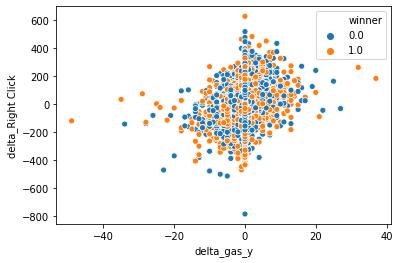

In [0]:
import seaborn as sns
sns.scatterplot(data = train,x= 'delta_gas_y',y = 'delta_Right Click',hue='winner')

- 가스 데이터는 의미없는 것으로 보이므로 삭제
- 

# 적군staring point 발견

## 적군 기지 인근 거리 20이하 location 첫번째 데이터

In [6]:
rightc.head()

,game_id,time,player,species,event,event_contents
0,38872,0.03,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5..."
1,38872,0.04,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5..."
2,38872,0.20,0,1,3,"Location: (31.235595703125, 93.552734375, 49122)"
3,38872,0.21,0,1,3,"Location: (31.5546875, 93.2060546875, 49122)"
4,38872,0.23,1,1,3,"Location: (122.58837890625, 148.31689453125, 4..."


In [0]:
p0_starting

In [0]:
p1_starting

In [0]:
p0_find_enemy = p0_starting[p0_starting.enemy_rc<20]

In [0]:
p1_find_enemy = p1_starting[p1_starting.enemy_rc<20]

In [0]:
p0_find_enemy = p0_find_enemy[p0_find_enemy.game_id.shift(1) != p0_find_enemy.game_id]

In [0]:
p1_find_enemy = p1_find_enemy[p1_find_enemy.game_id.shift(1) != p1_find_enemy.game_id]

In [173]:
p1_find_enemy

,game_id,winner,time,player,species,event,event_contents,loc_x,loc_y,loc_z,Unnamed: 0,P0_x,P0_y,P1_x,P1_y,P0_starting,P1_starting,enemy_rc
32,1.0,1.0,0.58,1.0,0.0,3.0,"Location: (130.526123046875, 165.581298828125,...",130.526123,165.581299,49104.0,1,140.00,162.007812,28.00,18.507812,10,9,10.125421
163,2.0,0.0,3.16,1.0,2.0,3.0,"Location: (133.190673828125, 15.577392578125, ...",133.190674,15.577393,49152.0,2,151.25,20.507812,24.75,128.007812,12,13,18.720264
408,3.0,0.0,5.07,1.0,1.0,3.0,"Location: (133.62548828125, 37.767333984375, 4...",133.625488,37.767334,49136.0,3,127.25,27.507812,24.75,137.007812,2,7,12.079099
632,4.0,0.0,0.38,1.0,2.0,3.0,"Location: (47.9541015625, 128.48193359375, 49088)",47.954102,128.481934,49088.0,4,36.75,122.007812,163.25,18.507812,11,10,12.940098
748,5.0,0.0,2.17,1.0,1.0,3.0,"Location: (31.4150390625, 129.91650390625, 48462)",31.415039,129.916504,48462.0,5,22.75,147.007812,145.25,21.507812,9,5,19.162352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775544,38865.0,1.0,0.17,1.0,2.0,3.0,"Location: (44.63134765625, 20.3720703125, 49104)",44.631348,20.372070,49104.0,38865,28.00,18.507812,140.00,162.007812,4,3,16.735507
5775581,38867.0,1.0,0.51,1.0,1.0,3.0,"Location: (13.4501953125, 133.767333984375, 33...",13.450195,133.767334,33301.0,38867,22.75,147.007812,145.25,21.507812,9,5,16.180131
5775663,38869.0,0.0,2.03,1.0,2.0,3.0,"Location: (164.888671875, 32.6025390625, 32752)",164.888672,32.602539,32752.0,38869,151.25,20.507812,24.75,128.011719,12,13,18.228982
5775831,38870.0,1.0,4.05,1.0,1.0,3.0,"Location: (154.656494140625, 139.968994140625,...",154.656494,139.968994,49120.0,38870,152.25,142.007812,31.75,22.507812,6,4,3.154044


In [0]:
p0_find_enemy.index= p0_find_enemy.game_id
p1_find_enemy.index= p1_find_enemy.game_id

In [0]:
# 0값을 nan 처리하지 못하게
p0_find_enemy.loc[p0_find_enemy.time==0,'time'] = 0.001
p1_find_enemy.loc[p1_find_enemy.time==0,'time'] = 0.001

In [0]:
df_time = pd.DataFrame(train.game_id.unique(),columns=['game_id'])
df_time.index = df_time.game_id
df_time.drop('game_id',axis=1,inplace=True)

In [0]:
df_p0_find_enemy = pd.DataFrame(p0_find_enemy.game_id.unique(),columns=['game_id'])
df_p0_find_enemy.index = df_p0_find_enemy.game_id
df_p0_find_enemy.drop('game_id',axis=1,inplace=True)

df_p1_find_enemy = pd.DataFrame(p1_find_enemy.game_id.unique(),columns=['game_id'])
df_p1_find_enemy.index = df_p1_find_enemy.game_id
df_p1_find_enemy.drop('game_id',axis=1,inplace=True)

In [0]:
df_p0_find_enemy['P0_time'] = p0_find_enemy.time
df_p1_find_enemy['P1_time'] = p1_find_enemy.time

In [185]:
df_p0_find_enemy[df_p0_find_enemy.P0_time.notnull()]

,P0_time
game_id,
0.0,0.02
2.0,3.31
3.0,5.36
4.0,0.43
6.0,3.44
...,...
38863.0,5.40
38867.0,0.35
38868.0,1.19


In [0]:
df_time = pd.merge(df_time,df_p0_find_enemy,on='game_id',how='left')
df_time = pd.merge(df_time,df_p1_find_enemy,on='game_id',how='left')


In [187]:
df_time

,P0_time,P1_time
game_id,,
0,0.02,NaN
1,NaN,0.58
2,3.31,3.16
3,5.36,5.07
4,0.43,0.38
...,...,...
38867,0.35,0.51
38868,1.19,NaN
38869,2.15,2.03


In [0]:
df_time.P0_time = df_time.P0_time.fillna(999)
df_time.P1_time = df_time.P1_time.fillna(999)

In [0]:
df_time['P0_early_find'] = (df_time.P1_time>df_time.P0_time).astype(int)
df_time['P1_early_find'] = (df_time.P1_time<df_time.P0_time).astype(int)

In [190]:
df_time

,P0_time,P1_time,P0_early_find,P1_early_find
game_id,,,,
0,0.02,999.00,1,0
1,999.00,0.58,0,1
2,3.31,3.16,0,1
3,5.36,5.07,0,1
4,0.43,0.38,0,1
...,...,...,...,...
38867,0.35,0.51,1,0
38868,1.19,999.00,1,0
38869,2.15,2.03,0,1


test data 만들기

In [0]:
import pandas as pd
rightc = pd.read_feather('data/t_rightc.feather')

In [5]:
print(rightc.shape)
rightc.head()

(4929970, 6)


,game_id,time,player,species,event,event_contents
0,38872,0.03,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5..."
1,38872,0.04,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5..."
2,38872,0.20,0,1,3,"Location: (31.235595703125, 93.552734375, 49122)"
3,38872,0.21,0,1,3,"Location: (31.5546875, 93.2060546875, 49122)"
4,38872,0.23,1,1,3,"Location: (122.58837890625, 148.31689453125, 4..."


In [18]:
len(rightc.game_id.unique())

16786

In [0]:
starting = pd.read_csv('data/t_starting.csv')

In [0]:
import re
pat = re.compile('Location+\S\s\S[0-9.,\s]+\S')
location= rightc.event_contents.apply(lambda x: pat.search(x).group())

In [0]:
pat2 = re.compile('[^0-9,.]')
location = location.apply(lambda x: pat2.sub('',x).split(','))

In [0]:
loc_x =location.str[0].astype(float)
loc_y =location.str[1].astype(float)
# loc_z =location.str[2].astype(float)

In [0]:
loc_z =location.str[2].astype(float)

In [0]:
# rightc['loc_x'] = loc_x
# rightc['loc_y'] = loc_y
# rightc['loc_z'] = loc_z

In [112]:
rightc

,game_id,time,player,species,event,event_contents,loc_x,loc_y,loc_z
0,38872,0.03,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5...",18.000000,87.500000,49120.0
1,38872,0.04,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5...",18.000000,87.500000,49120.0
2,38872,0.20,0,1,3,"Location: (31.235595703125, 93.552734375, 49122)",31.235596,93.552734,49122.0
3,38872,0.21,0,1,3,"Location: (31.5546875, 93.2060546875, 49122)",31.554688,93.206055,49122.0
4,38872,0.23,1,1,3,"Location: (122.58837890625, 148.31689453125, 4...",122.588379,148.316895,49123.0
...,...,...,...,...,...,...,...,...,...
4929965,55658,4.53,1,0,3,"Location: (120.1533203125, 53.713623046875, 36...",120.153320,53.713623,36340.0
4929966,55658,4.54,1,0,3,"Location: (120.584228515625, 56.930419921875, ...",120.584229,56.930420,39238.0
4929967,55658,4.54,1,0,3,"Location: (122.146728515625, 55.52099609375, 3...",122.146729,55.520996,36195.0
4929968,55658,4.54,1,0,3,"Location: (123.6767578125, 54.140625, 33215)",123.676758,54.140625,33215.0


In [26]:
location[location.str[0]==24.580078125]

Series([], Name: event_contents, dtype: object)

In [0]:
# len(loc_x),len(loc_y),len(loc_z)

(11565877, 11565877, 11565877)

In [0]:
p0_rc =rightc[rightc.player==0]
p1_rc = rightc[rightc.player==1]

In [0]:
p0_starting = pd.merge(p0_rc,starting,on='game_id',how='left')
p1_starting = pd.merge(p1_rc,starting,on='game_id',how='left')


In [115]:
p0_starting

,game_id,time,player,species,event,event_contents,loc_x,loc_y,loc_z,P0_x,P0_y,P1_x,P1_y,P0_starting,P1_starting
0,38872,0.03,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5...",18.000000,87.500000,49120.0,22.25,81.507812,120.25,153.839844,5,6
1,38872,0.04,0,1,3,"Target: None [01FC0001]; Location: (18.0, 87.5...",18.000000,87.500000,49120.0,22.25,81.507812,120.25,153.839844,5,6
2,38872,0.20,0,1,3,"Location: (31.235595703125, 93.552734375, 49122)",31.235596,93.552734,49122.0,22.25,81.507812,120.25,153.839844,5,6
3,38872,0.21,0,1,3,"Location: (31.5546875, 93.2060546875, 49122)",31.554688,93.206055,49122.0,22.25,81.507812,120.25,153.839844,5,6
4,38872,0.35,0,1,3,"Location: (114.5341796875, 149.1162109375, 49120)",114.534180,149.116211,49120.0,22.25,81.507812,120.25,153.839844,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456849,55658,4.32,0,2,3,"Location: (133.068603515625, 26.3720703125, 40...",133.068604,26.372070,40896.0,36.75,122.007812,163.25,18.507812,10,1
2456850,55658,4.33,0,2,3,"Location: (132.488525390625, 26.3720703125, 40...",132.488525,26.372070,40896.0,36.75,122.007812,163.25,18.507812,10,1
2456851,55658,4.38,0,2,3,"Location: (130.748046875, 26.3720703125, 40905)",130.748047,26.372070,40905.0,36.75,122.007812,163.25,18.507812,10,1
2456852,55658,4.52,0,2,3,"Location: (71.572509765625, 119.393798828125, ...",71.572510,119.393799,40896.0,36.75,122.007812,163.25,18.507812,10,1


In [0]:
train = pd.read_csv('data/xy_train.csv')

In [195]:
train.corr()

,Unnamed: 0,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,player0_starting,player1_starting,map,P0_enemy_rc,P1_enemy_rc,delta_enemy_rc,early_find,P0_early_find,P1_early_find
Unnamed: 0,1.000000,1.000000,-0.002622,0.001499,0.003999,0.008434,0.008644,-0.001361,0.002288,0.005762,-0.008338,0.000840,-0.000802,0.000619,-0.000291,0.004355,0.005631,-0.001547,0.000164,0.000116,0.002387,0.003048,0.013285,0.004818,-0.005895,0.003250,0.004256,-0.005969,0.001052,0.005534,-0.004779,0.000246,0.002758,-0.004624,-0.001079,-0.005413,0.006813,0.005806,0.000711,-0.001798,-0.000655,-0.001798
game_id,1.000000,1.000000,-0.002622,0.001499,0.003999,0.008434,0.008644,-0.001361,0.002288,0.005762,-0.008338,0.000840,-0.000802,0.000619,-0.000291,0.004355,0.005631,-0.001547,0.000164,0.000116,0.002387,0.003048,0.013285,0.004818,-0.005895,0.003250,0.004256,-0.005969,0.001052,0.005534,-0.004779,0.000246,0.002758,-0.004624,-0.001079,-0.005413,0.006813,0.005806,0.000711,-0.001798,-0.000655,-0.001798
P0_species,-0.002622,-0.002622,1.000000,-0.119401,0.334785,-0.171471,-0.033550,-0.112732,-0.079261,0.096722,0.037218,-0.027323,-0.000942,-0.040500,0.031137,0.020895,0.012934,0.011316,0.010642,-0.001234,-0.122764,0.337923,-0.308678,-0.060772,-0.105700,-0.076835,0.065469,0.027160,-0.013853,-0.015519,-0.002592,-0.046815,0.350734,-0.009977,-0.000605,-0.000475,-0.031434,0.003873,-0.025071,-0.076839,0.077811,-0.076839
P0_Camera,0.001499,0.001499,-0.119401,1.000000,0.299290,0.549759,0.421668,0.142519,0.067289,0.143474,0.000599,-0.008971,0.535632,0.363033,0.536892,0.400536,0.156313,0.098422,0.168816,0.019335,0.479866,-0.055609,0.015946,0.025639,-0.012031,-0.026165,-0.018818,-0.013496,0.009406,0.451147,0.443546,0.357231,0.293238,-0.001323,-0.006875,-0.035032,0.211306,0.243327,-0.022881,0.038820,0.063122,0.038820
P0_Selection,0.003999,0.003999,0.334785,0.299290,1.000000,0.575331,0.530315,0.285560,0.382854,0.270782,0.165030,-0.044298,0.369742,0.380629,0.585358,0.486595,0.306447,0.273515,0.189436,0.040861,-0.073970,0.559954,-0.019238,0.051327,-0.018410,0.093493,0.062345,0.087078,-0.040724,0.491183,0.468719,0.364348,0.994499,0.002913,0.003020,0.004603,0.242897,0.259842,-0.012187,0.019968,0.070601,0.019968
P0_Ability,0.008434,0.008434,-0.171471,0.549759,0.575331,1.000000,0.716003,0.490138,0.442110,0.293808,0.074723,0.026357,0.533545,0.584465,0.785260,0.639539,0.382954,0.341467,0.279557,0.077053,0.015422,-0.005296,0.321611,0.088708,0.089064,0.086289,0.011576,-0.002720,-0.059533,0.794101,0.657254,0.568714,0.553586,0.004610,0.003543,0.000531,0.398561,0.339557,0.041690,0.064309,0.066973,0.064309
P0_Right Click,0.008644,0.008644,-0.033550,0.421668,0.530315,0.716003,1.000000,0.454200,0.396394,0.237965,0.066871,0.011335,0.400648,0.482478,0.642154,0.598286,0.343067,0.302983,0.218724,0.058023,0.020747,0.045522,0.108076,0.452178,0.092495,0.080053,0.015207,0.005435,-0.032989,0.574701,0.498221,0.466221,0.508071,0.004069,0.000942,0.011309,0.649816,0.351471,0.211614,0.003851,0.142309,0.003851
P0_SetControlGroup,-0.001361,-0.001361,-0.112732,0.142519,0.285560,0.490138,0.454200,1.000000,0.465413,-0.054332,-0.038973,0.016655,0.156842,0.313855,0.387205,0.349444,0.295111,0.283299,0.143292,0.052656,-0.015250,-0.023918,0.154086,0.118886,0.591878,0.155276,-0.149861,-0.065413,-0.049926,0.409373,0.341390,0.305949,0.268901,-0.011022,-0.015149,-0.006803,0.254711,0.168043,0.061434,0.009787,0.056849,0.009787
P0_GetControlGroup,0.002288,0.002288,-0.079261,0.067289,0.382854,0.442110,0.396394,0.465413,1.000000,0.222960,0.089471,0.013262,0.095258,0.274105,0.339672,0.302204,0.284583,0.303567,